In [5]:
import pandas as pd
from data_preprocess import create_sequences,getdata
from sklearn.preprocessing import MinMaxScaler
from model import getLSTM
import numpy as np

def train(X,y,model):
    
    # Train the model
    model.fit(X, y, epochs=70, batch_size=32)

    # Evaluate the model
    train_loss = model.evaluate(X, y, verbose=0)
    #test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'Train Loss: {train_loss:.6f}')
    return model
    #print(f'Test Loss: {test_loss:.6f}')
    
    

In [6]:
X,y,scaler=getdata('./yfinance_2020-2024_day.csv')
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size],y[:train_size]
model=getLSTM((X_train.shape[1], X_train.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')
model=train(X_train,y_train,model)
train_predictions = model.predict(X_train)


Epoch 1/70


/Users/fanjuling/anaconda3/envs/506proj/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1143  
Epoch 2/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055
Epoch 3/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0023
Epoch 4/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019
Epoch 5/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 6/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015
Epoch 7/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 8/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 9/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 10/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 11/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 12/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 13/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0013
Epoch 14/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 15/70
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012    
Epoch 16/70
25/25 ━━━━━━

In [9]:
def test(X_test, model, steps=1):
    """
    手动预测未来的值并滚动更新 X_test。
    
    参数：
    X_test 用于预测的初始输入序列
    y_test 实际值（用于与预测值比较）
    

    返回：
    predictions 包含所有预测值的列表
    """
    # 初始化预测列表
    predictions = []

    # 使用滚动预测预测未来的值
    for _ in range(steps):
        # 使用模型预测当前 X_test 的最后一个时间步
        predicted = model.predict(X_test[-1].reshape(1, X_test.shape[1], X_test.shape[2]))
        
        # 将预测结果存储
        predictions.append(predicted[0, 0])
        
        # 将预测的值加到 X_test 中，构成新的输入
        new_input = np.append(X_test[-1, 1:], predicted, axis=0)  # 弹出第一个，加上预测值
        new_input = new_input.reshape(1, X_test.shape[1], X_test.shape[2])
        
        # 将新输入添加到 X_test 中用于下一步预测，并保持窗口大小固定
        X_test = np.append(X_test[1:], new_input, axis=0)

    return predictions


In [10]:
test_predictions=test(X_train,model,196)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

In [14]:
train_predictions_unscaled = scaler.inverse_transform(train_predictions)
y_train = y_train.reshape(-1, 1)
y_train_unscaled = scaler.inverse_transform(y_train)
test_predictions=np.array(test_predictions).reshape(-1,1)
test_predictions_unscaled = scaler.inverse_transform(test_predictions)
y_test=y[train_size:]
y_test = y_test.reshape(-1, 1)
y_test_unscaled = scaler.inverse_transform(y_test)

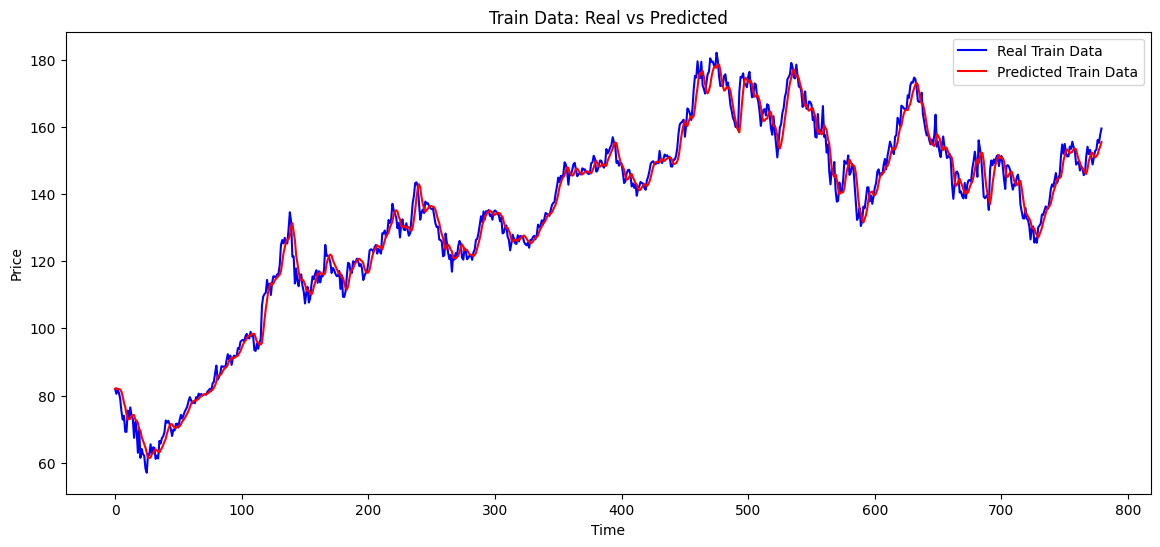

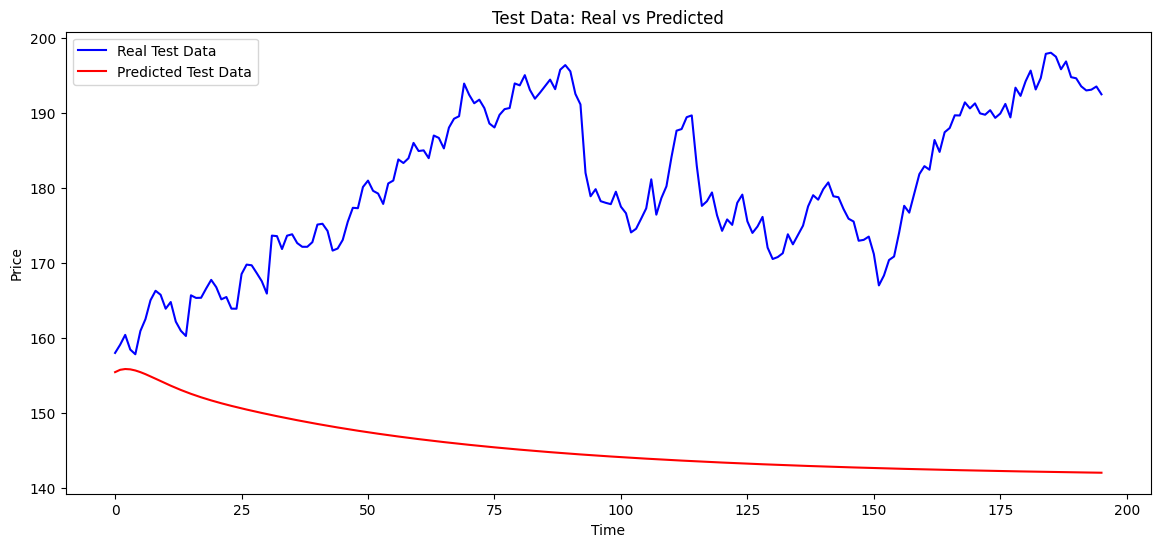

In [15]:
import matplotlib.pyplot as plt

# 假设 train_predictions、y_train_unscaled、test_predictions、y_test_unscaled 已经正确反归一化

# 绘制训练数据的预测值和真实值
plt.figure(figsize=(14, 6))
plt.plot(y_train_unscaled, label="Real Train Data", color="blue")
plt.plot(train_predictions_unscaled, label="Predicted Train Data", color="red")
plt.title("Train Data: Real vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# 绘制测试数据的预测值和真实值
plt.figure(figsize=(14, 6))
plt.plot(y_test_unscaled, label="Real Test Data", color="blue")
plt.plot(test_predictions_unscaled, label="Predicted Test Data", color="red")
plt.title("Test Data: Real vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [18]:
model.save('model.h5')

In [20]:
original_data = pd.read_csv('yfinance_2020-2024_day.csv', usecols=['Date'])
original_data['Date'] = pd.to_datetime(original_data['Date'])

# 3. 将预测结果与日期配对，假设 train_predictions 是您的预测结果
predictions_df = pd.DataFrame({
    'Date': original_data['Date'][-len(y_test_unscaled):],  # 使用原始数据中的日期
    'Predicted_Close': y_test_unscaled.flatten()  # 确保预测结果是一维
})

# 4. 保存为 CSV 文件
predictions_df.to_csv('predictions_with_dates.csv', index=False)